# Machine Learning

   By Eng-Janvier NIYITEGEKA,
   email: nijas2012@yahoo.com,
    Data scientist,
    MSc.IoT-ECS /UR-ACEIoT,
   Assistant Lecturer/IPRC TUMBA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We observe 10 points according to the following equation, which is the function $\sin(2 \pi x_n)$ with an added noise having a Gaussian distribution. $x_n$ is spaced uniformly in range $[0, 1]$.

$
y_n = \sin(2 \pi x_n) + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, \, 0.3)
$

We will fit the following polynomial to these data. 

$
\begin{align}
\hat{y}_n &= w_0 + w_1 x_n + w_2 x_n^2 + \cdots + w_M x_n^M\\
          &= w_0 + \sum_{m=1}^{M} w_m x_n^m
\end{align}
$

First, generate the data.

In [2]:
x_train = np.linspace(0, 1, 10)
y_train = np.sin(2 * np.pi * x_train) + np.random.normal(scale=0.3, size=10)

In [3]:
x_test = np.linspace(0, 1, 10)
y_test = np.sin(2 * np.pi * x_test) + np.random.normal(scale=0.3, size=10)

Next, visualize the training data and true sine curve.

(-1.5, 1.5)

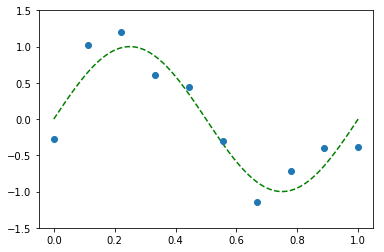

In [4]:
xlist = np.linspace(0, 1, 101)
ylist = np.sin(2 * np.pi * xlist)
plt.plot(xlist, ylist, color='green', linestyle='--')
plt.plot(x_train, y_train, 'o')
plt.xlim(-0.05, 1.05)
plt.ylim(-1.5, 1.5)

## 1. Solve cubic polynomial

I will show you an example of fitting cubic polynomial. The cubic polynomial is as follows:

$
\begin{align}
\hat{y}_n &= w_0 + w_1 x_n + w_2 x_n^2 + w_3 x_n^3\\
        &= w_0 + \sum_{m=1}^{3} w_m x_n^m
\end{align}
$

The fitted polynomial curve can be obtained by minimizing the following equation which is called mean squared error(MSE).

$
E = \frac{1}{N} \sum_{n=1}^{N} \left\{ y_n - {\hat{y}_n} \right\} ^2
$

Let's solve it using Scikit-Learn.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
poly = PolynomialFeatures(degree=3, include_bias=False)
features = poly.fit_transform(x_train[:, np.newaxis])

In [7]:
lr = LinearRegression()
lr.fit(features, y_train)
mse = mean_squared_error(y_train, lr.predict(features))

Then, visualize the cubic curve which we got.

Text(0.5, 1.0, 'M=3, MSE: 0.07')

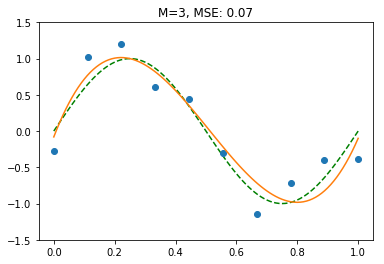

In [8]:
xlist = np.linspace(0, 1, 101)
ylist = np.sin(2 * np.pi * xlist)
plt.plot(xlist, ylist, color='green', linestyle='--')
plt.plot(x_train, y_train, 'o')
plt.plot(xlist, lr.predict(poly.transform(xlist[:, np.newaxis])))
plt.xlim(-0.05, 1.05)
plt.ylim(-1.5, 1.5)
plt.title('M={}, MSE: {:.2f}'.format(3, mse))

# 2. Change the order of polynomials

**Q1. Solve polynomial regression when the order is 1, 3, 6, 9, and then draw the curve as above.**

A1. Write your answer in the next "# implement here".

In [9]:
M = [1, 3, 6, 9]

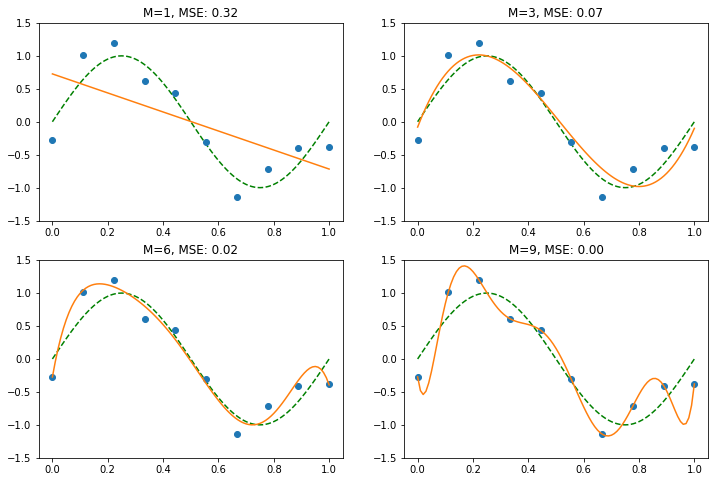

In [10]:
fig = plt.figure(figsize=(12, 4 * -(-len(M) // 2)))
for i, m in enumerate(M):
    ax = fig.add_subplot(-(-len(M) // 2), 2, i + 1)
    xlist = np.linspace(0, 1, 101)
    ylist = np.sin(2 * np.pi * xlist)
    ax.plot(xlist, ylist, color='green', linestyle='--')
    ax.plot(x_train, y_train, 'o')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-1.5, 1.5)
    
    # implement here
    poly = PolynomialFeatures(degree=m, include_bias=False)
    features = poly.fit_transform(x_train[:, np.newaxis])
    lr.fit(features, y_train)
    mse = mean_squared_error(y_train, lr.predict(features))
    ax.plot(xlist, lr.predict(poly.transform(xlist[:, np.newaxis])))
    
    ax.set_title('M={}, MSE: {:.2f}'.format(m, mse))

**Q2. When the order is 9, MSE which we want to minimize is equal to 0, but the curve does not look good. Explain this phenomenon using the word overfitting.**

A2. Write your answer here.

ANSWER:
    
In Machine learning overfitting occurs when a model learns the details and noise from the given training data set at the level it impacts negatively the performance of the model on new data.This means that the model predicts well on the given data set but fail to predict on the new data not given before. The model shows a poor performance on the unknown data becuase the model picked up the noise in the training data and learned.

In our case when order is 9, the model picked up all details in the given data includding the noise during of the training. Thus during the prediction the model predicted well with 100% of Accuracy for the training data and 0.0 of mean squared error. This means the model do not generalize. Thus the given curve of prediction passes through all data points.    

**Q3. Explain how to determine the best order and implement it.**

A3. Write your answer here.

ANSWER:

The best order allows the model to perform generalization(finds trend in the given training data set). This gives the model to learn the given data excludding the noise. This model provide the high performance during of training and testing. This means the model can predict well on the applied new data (unseen data).

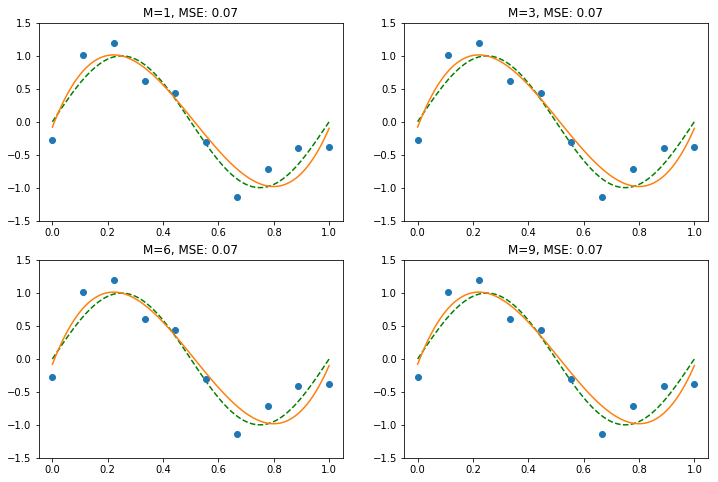

In [11]:
# implement here
fig = plt.figure(figsize=(12, 4 * -(-len(M) // 2)))
for i, m in enumerate(M):
    ax = fig.add_subplot(-(-len(M) // 2), 2, i + 1)
    xlist = np.linspace(0, 1, 101)
    ylist = np.sin(2 * np.pi * xlist)
    ax.plot(xlist, ylist, color='green', linestyle='--')
    ax.plot(x_train, y_train, 'o')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-1.5, 1.5)
    
    # implement here
    poly = PolynomialFeatures(degree=3, include_bias=False)
    features = poly.fit_transform(x_train[:, np.newaxis])
    lr.fit(features, y_train)
    mse = mean_squared_error(y_train, lr.predict(features))
    ax.plot(xlist, lr.predict(poly.transform(xlist[:, np.newaxis])))
    
    ax.set_title('M={}, MSE: {:.2f}'.format(m, mse))

# 3. Ridge Regression

Let's see the coefficients $\{w_m\}_{m=0}^{9}$ when the order is 9.

In [12]:
df_ws = pd.DataFrame()
poly = PolynomialFeatures(degree=9, include_bias=False)
features = poly.fit_transform(x_train[:, np.newaxis])
lr = LinearRegression()
lr.fit(features, y_train)
df_ws = df_ws.append(pd.Series(np.hstack([lr.intercept_, lr.coef_]), name='M=9'))
df_ws.transpose()
#df_ws

,M=9
0,-0.271618
1,-29.625481
2,964.795549
3,-8294.592695
4,33932.121093
5,-76452.839453
6,98427.184228
7,-70366.184495
8,24811.212248
9,-2992.179264


**Q4. Calculate the coefficients with orders of 1 to 9 and describe what the trend is.**

A4. Write your answer here.

In [20]:
M=[1,2,3,4,5,6,7,8,9]
df_ws = pd.DataFrame()
for m in M:
    poly = PolynomialFeatures(degree=m, include_bias=False)
    features = poly.fit_transform(x_train[:, np.newaxis])
    lr = LinearRegression()
    lr.fit(features, y_train)
    df_ws = df_ws.append(pd.Series(np.hstack([lr.intercept_, lr.coef_]), name=('M='+str(m)))) 

In [21]:
df_ws.transpose()

,M=1,M=2,M=3,M=4,M=5,M=6,M=7,M=8,M=9
0,0.726170,0.631682,-0.080395,-0.286479,-0.237110,-0.273920,-0.279107,-0.271675,-0.271618
1,-1.443944,-0.806148,10.917684,18.645849,14.148380,23.971117,29.580248,-23.607769,-29.625481
2,NaN,-0.637797,-31.536832,-70.564066,-33.074874,-154.260610,-246.815656,825.796875,964.795549
3,NaN,NaN,20.599357,83.197496,-22.771955,498.822814,1047.684813,-7042.580515,-8294.592695
4,NaN,NaN,NaN,-31.299070,90.165914,-917.803398,-2469.744193,28050.334783,33932.121093
5,NaN,NaN,NaN,NaN,-48.585993,848.020320,3111.202323,-60428.668826,-76452.839453
6,NaN,NaN,NaN,NaN,NaN,-298.868771,-1941.274457,72188.575217,98427.184228
7,NaN,NaN,NaN,NaN,NaN,NaN,469.258767,-44916.363482,-70366.184495
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11346.405562,24811.212248
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2992.179264




ANSWER:
The number and the values of coefficients increase with increasing the order of the polynomial

Let's see the effect of L2 regularization.
Ridge regression minimize the following equation which is added L2 regularization term to MSE


$
E = \frac{1}{N} \sum_{n=1}^{N} \left\{ y_n - {\hat{y}_n} \right\}^2 + \alpha \| \boldsymbol{w} \|_2^2
$

where $\| \boldsymbol{w} \|_2^2 = \sum_{m=0}^{M} w_m^2$ and $\alpha$ is a regularization parameter.

**Q5. Solve Ridge regression when the order is 9 and $\alpha$ is 1, 0.1, 0.01, 0.001, and then draw the curve as Q1.**

A5. Write your answer in the next "# implement here".

In [22]:
from sklearn.linear_model import Ridge

In [23]:
ALPHA = [1, 0.1, 0.01, 0.001]

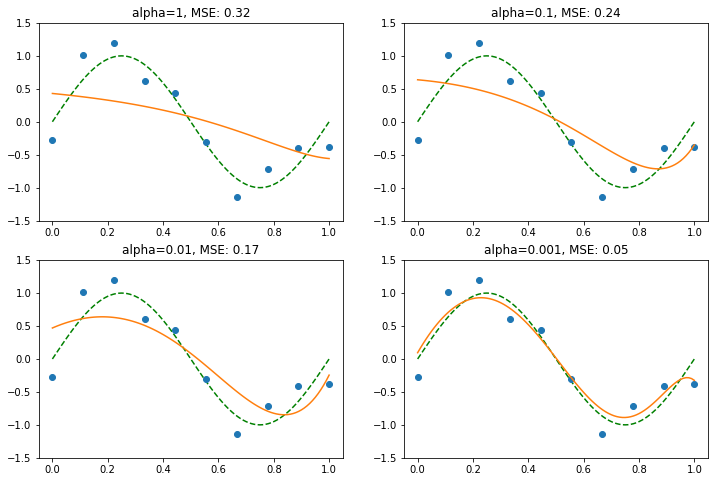

In [24]:
fig = plt.figure(figsize=(12, 4 * -(-len(ALPHA) // 2)))
for i, a in enumerate(ALPHA):
    ax = fig.add_subplot(-(-len(ALPHA) // 2), 2, i + 1)
    xlist = np.linspace(0, 1, 101)
    ylist = np.sin(2 * np.pi * xlist)
    ax.plot(xlist, ylist, color='green', linestyle='--')
    ax.plot(x_train, y_train, 'o')
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-1.5, 1.5)
    
    # implement here
    poly = PolynomialFeatures(degree=9, include_bias=False)
    features = poly.fit_transform(x_train[:, np.newaxis])
    lr=Ridge(alpha=a)
    lr.fit(features, y_train)
    mse = mean_squared_error(y_train, lr.predict(features))
    ax.plot(xlist, lr.predict(poly.transform(xlist[:, np.newaxis])))
    
    ax.set_title('alpha={}, MSE: {:.2f}'.format(a, mse))

**Q6. Calculate the coefficients of Ridge regression($\alpha=0.001$)  with orders of 1 to 9.**

A6.Write your answer in the next "# implement here".

In [28]:
# implement here
M=[1,2,3,4,5,6,7,8,9]
df_ws = pd.DataFrame()
for m in M:
    poly = PolynomialFeatures(degree=m, include_bias=False)
    features = poly.fit_transform(x_train[:, np.newaxis])
    lr =Ridge(alpha=0.001)
    lr.fit(features, y_train)
    df_ws=df_ws.append(pd.Series(np.hstack([lr.intercept_, lr.coef_]), name=('M='+str(m))))


In [30]:
df_ws.transpose()

,M=1,M=2,M=3,M=4,M=5,M=6,M=7,M=8,M=9
0,0.725462,0.630987,0.240313,0.171479,0.171854,0.158319,0.133791,0.110957,0.095106
1,-1.442528,-0.803327,6.139200,6.160009,6.064276,6.466202,6.913553,7.182538,7.273728
2,NaN,-0.639828,-19.479332,-14.997954,-14.566521,-15.548664,-16.031086,-15.834156,-15.296256
3,NaN,NaN,12.773250,1.033345,0.957896,0.046318,-1.583961,-2.989514,-3.872446
4,NaN,NaN,NaN,7.457164,6.344114,7.468405,7.021071,5.719437,4.384672
5,NaN,NaN,NaN,NaN,0.863891,5.031243,7.395457,7.740170,7.115126
6,NaN,NaN,NaN,NaN,NaN,-3.824491,2.159655,5.091544,6.002110
7,NaN,NaN,NaN,NaN,NaN,NaN,-6.259426,-0.284529,2.642131
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.029464,-1.861733
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.807296


**Q7. Explain the effect of regularization.**

A7. Write your answer here.

ANSWER: 

Regularization is the techniques used by AI engineer to reduce model complexity and prevent over-fitting which may result from simple linear regression.

From the result of the problem given above by using Ridge Regression which added L2 regularization term to MSE(Mean Squared Error) of the normal Linear Regression problem, the regularization reduces the training weights of the model to the value closer to zero.

This means that the regularization in machine learning decreases the effect of higher weights for avoiding the overfitting problem during of training.